In this EDA, we are focusing on order_products_prior.csv.
- Avg. basket size
- Overall reorder rate
- Top products / aisles / departments
- Reorder rate by aisle & department
- A light co-occurrence pairs preview (support, confidence, lift) on a sampled set of orders

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orderdf = pd.read_csv('./instacart-market-basket-analysis/orders.csv')
productsdf = pd.read_csv('./instacart-market-basket-analysis/products.csv')
aislesdf = pd.read_csv('./instacart-market-basket-analysis/aisles.csv')
deptdf = pd.read_csv('./instacart-market-basket-analysis/departments.csv')
priordf=pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')
priordf

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


### Attaching aisle/dept names to each product row
here we added the aisle and dept name to the products df. 

In [4]:
prod_h = productsdf.merge(aislesdf, on='aisle_id', how='left').merge(deptdf, on='department_id', how='left')
prod_h

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


Here we got the product names and hierarchy onto the prior line items. 

In [6]:
prior_h = priordf.merge(prod_h[["product_id","product_name","aisle","department"]],on="product_id", how="left")
prior_withtime = prior_h.merge(orderdf[["order_id","user_id","order_dow","order_hour_of_day","days_since_prior_order"]], on="order_id", how="left")

prior_h

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2,33120,1,1,Organic Egg Whites,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,baking ingredients,pantry
...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,dish detergents,household
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,crackers,snacks
32434486,3421083,4600,8,0,All Natural French Toast Sticks,frozen breakfast,frozen
32434487,3421083,24852,9,1,Banana,fresh fruits,produce


Here we got the order day and time, onto the prior line items


In [7]:
prior_withtime.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department,user_id,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,eggs,dairy eggs,202279,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,fresh vegetables,produce,202279,5,9,8.0
2,2,9327,3,0,Garlic Powder,spices seasonings,pantry,202279,5,9,8.0
3,2,45918,4,1,Coconut Butter,oils vinegars,pantry,202279,5,9,8.0
4,2,30035,5,0,Natural Sweetener,baking ingredients,pantry,202279,5,9,8.0


### We will find the basket size: Number of products per order

Average basket size (prior): 10.09
Median  basket size (prior): 8


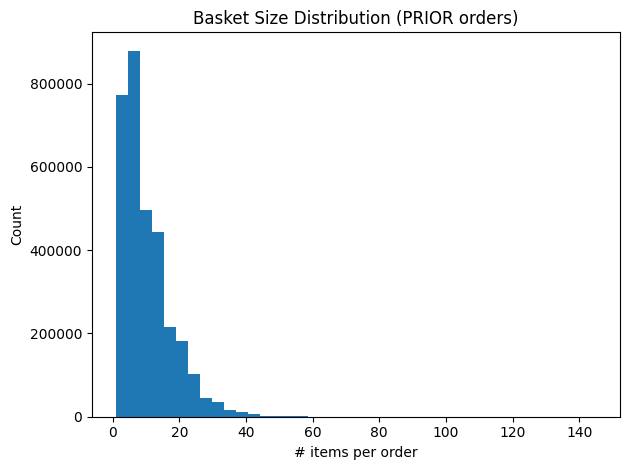

In [9]:
basket_size = prior_withtime.groupby("order_id")["product_id"].size()
# for each order, how many products
avg_basket_size = basket_size.mean()
median_basket_size = basket_size.median()

print(f"Average basket size (prior): {avg_basket_size:.2f}")
print(f"Median  basket size (prior): {median_basket_size:.0f}")

# basket_size
ax = basket_size.plot(kind="hist", bins=40)
ax.set_title("Basket Size Distribution (PRIOR orders)")
ax.set_xlabel("# items per order"); ax.set_ylabel("Count")
plt.tight_layout();
plt.show()

The graph above shows how many orders (y axis) were having the basket size (x axis).

In [13]:
basket_size.sort_values(ascending=False)

order_id
1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
118997       1
118995       1
1119343      1
870412       1
2530309      1
Name: product_id, Length: 3214874, dtype: int64

### We will look onto Reorders: Reordering Patterns

In [ ]:
overall_reorder_rate = prior_withtime["reordered"].mean()
print(f"Overall reorder rate (prior): {overall_reorder_rate:.3f}")

Overall reorder rate (prior): 0.590


Reorder rate by dept., aisles, and by products
- Here we are using lines, which basically is the total number of times that dept/aisle/product was ordered(purchase count)
- and we find the reorder rate = reorder/line

In [18]:
dept_stats=prior_withtime.groupby("department").agg(lines=("order_id","count"),reorder_rate=("reordered","mean")).sort_values("reorder_rate",ascending=False)

aisle_stats=prior_withtime.groupby("aisle").agg(lines=("order_id","count"),reorder_rate=("reordered","mean")).sort_values("reorder_rate",ascending=False)

prod_stats=prior_withtime.groupby(["product_id","product_name"]).agg(lines=("order_id","count"),reorder_rate=("reordered","mean")).reset_index()

prod_stats_filtered=prod_stats[prod_stats["lines"]>=500].sort_values(["reorder_rate","lines"],ascending=[False,False])

# dept_stats.head(10)
# aisle_stats.head(10)
prod_stats_filtered.head(10)

,product_id,product_name,lines,reorder_rate
9288,9292,Half And Half Ultra Pasteurized,2921,0.861691
45495,45504,Whole Organic Omega 3 Milk,9108,0.860233
43386,43394,Organic Lactose Free Whole Milk,8477,0.859030
5511,5514,Organic Homogenized Whole Milk,3970,0.857683
47220,47231,Ultra-Purified Water,1489,0.857623
29441,29447,"Milk, Organic, Vitamin D",20198,0.854342
38681,38689,Organic Reduced Fat Milk,35663,0.850686
34191,34197,Goat Milk,5185,0.849952
24848,24852,Banana,472565,0.843501
31714,31720,Organic Whole Milk,9842,0.841191


In [16]:
dept_stats.head(10)

,lines,reorder_rate
department,,
dairy eggs,5414016,0.669969
beverages,2690129,0.653460
produce,9479291,0.649913
bakery,1176787,0.628141
deli,1051249,0.607719
pets,97724,0.601285
babies,423802,0.578971
bulk,34573,0.577040
snacks,2887550,0.574180


In [17]:
aisle_stats.head(10)

,lines,reorder_rate
aisle,,
milk,891015,0.781428
water seltzer sparkling water,841533,0.729593
fresh fruits,3642188,0.718104
eggs,452134,0.705366
soy lactosefree,638253,0.692551
packaged produce,276028,0.690734
yogurt,1452343,0.686489
cream,318002,0.685046
bread,584834,0.670168


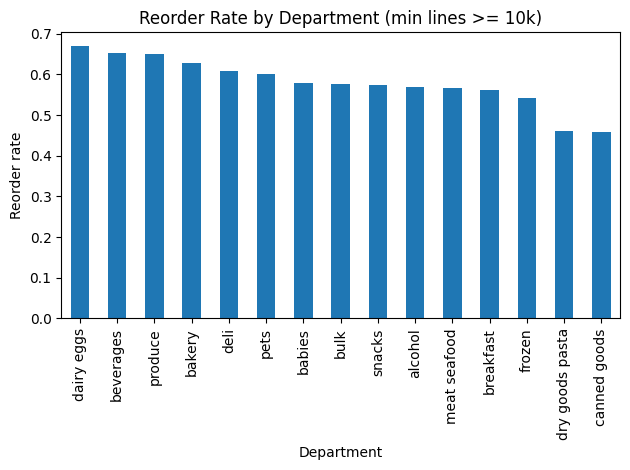

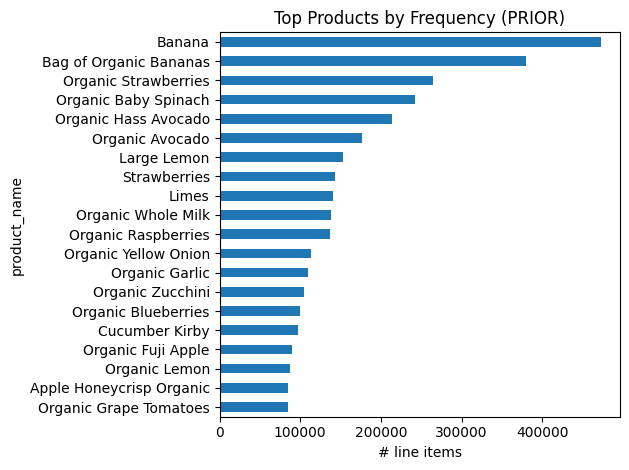

In [ ]:
plot_dept = dept_stats[dept_stats["lines"] >= 10000].head(15)

ax = plot_dept["reorder_rate"].plot(kind="bar")
ax.set_title("Reorder Rate by Department (min lines >= 10k)")
ax.set_xlabel("Department"); ax.set_ylabel("Reorder rate")
plt.tight_layout();
plt.show()

top_products = prod_stats.sort_values("lines", ascending=False).head(20)
ax = top_products.set_index("product_name")["lines"].plot(kind="barh")
ax.invert_yaxis()
ax.set_title("Top Products by Frequency (PRIOR)")
ax.set_xlabel("# line items")
plt.tight_layout();
plt.show()


### Looking at the time within prior lines. (What hour/day baskets were created)
- to find the peak times 

In [28]:
days_basket = prior_withtime["order_dow"].value_counts().sort_index()
hours_basket = prior_withtime["order_hour_of_day"].value_counts().sort_index().sort_values()

In [35]:
days_basket

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: count, dtype: int64

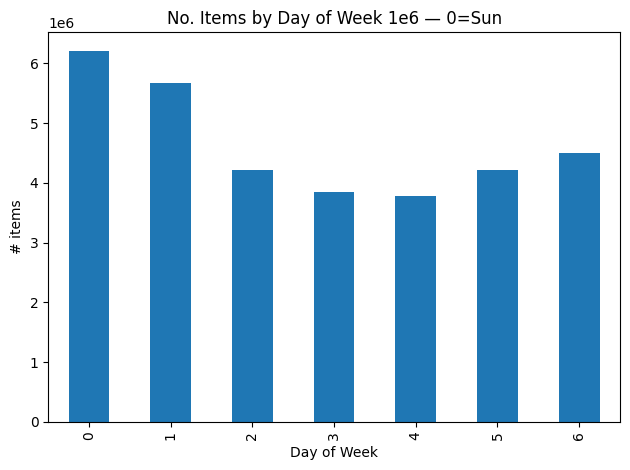

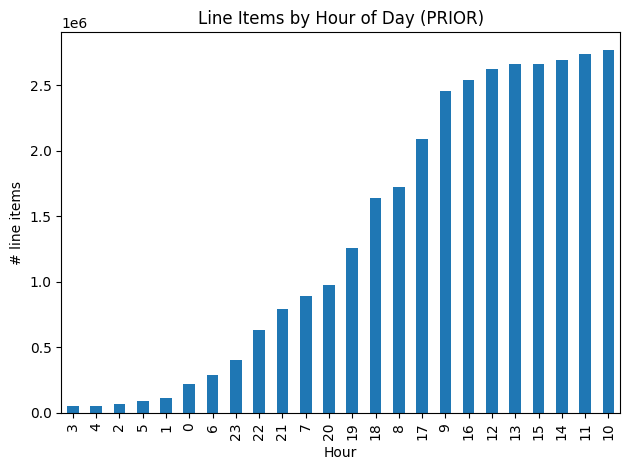

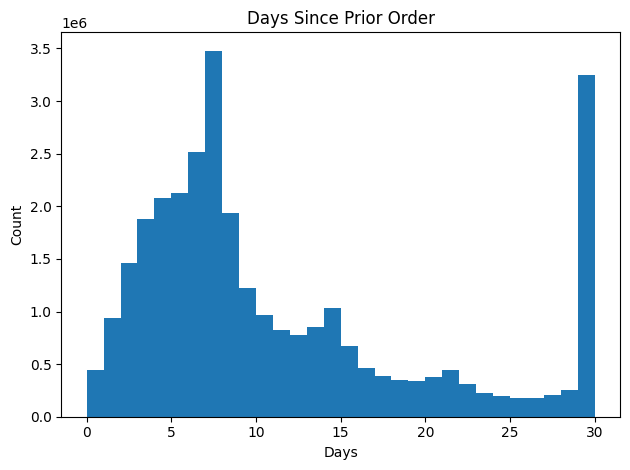

In [37]:
# from matplotlib.ticker import ScalarFormatter

# ax.yaxis.set_major_formatter(ScalarFormatter())
# ax.ticklabel_format(style='plain', axis='y')
#if showing full no. on y axis

ax = days_basket.plot(kind="bar")
ax.set_title("No. Items by Day of Week 1e6 — 0=Sun")
ax.set_xlabel("Day of Week"); ax.set_ylabel("# items")
plt.tight_layout();
plt.show()

ax = hours_basket.plot(kind="bar")
ax.set_title("Line Items by Hour of Day (PRIOR)")
ax.set_xlabel("Hour"); ax.set_ylabel("# line items")
plt.tight_layout();
plt.show()

# Days since prior order (exclude NaN which occur on first orders)
ax = prior_withtime["days_since_prior_order"].dropna().plot(kind="hist", bins=30)
ax.set_title("Days Since Prior Order")
ax.set_xlabel("Days"); ax.set_ylabel("Count")
plt.tight_layout();
plt.show()

### Product Co-occurence (What items were bought together)
- For now keeing it simple, it counts unordered pairs that appears in the same order.
- Later we can upgrade it to use Apriori or FP growth with minsup and conf.

In [41]:
import itertools
from typing import Counter

# just taking few values from the ds as its taking too long to make prod. combinations on the og dataset. 
small_prior_ds = prior_withtime.head(10000)
baskets = (small_prior_ds.groupby("order_id")["product_id"].apply(lambda x: sorted(set(x.tolist()))))
# basket ==> order id : {set of items}
pair_count = Counter()

for p in baskets:
    if len(p) < 2:
        continue
    for a,b in itertools.combinations(p,2):
        pair_count[(a,b)] +=1
    
pairs_df = pd.DataFrame([(a, b, c) for (a, b), c in pair_count.items()], columns=["prod_a", "prod_b", "count"]).sort_values("count", ascending=False)

pairs_df
#We will get products pairs with the count. 
#But rn, its having the product id and not the name. lets get the name to make it more friendly to read. 

name_p = prod_h.set_index("product_id")["product_name"]
pairs_df["name_a"] = pairs_df["prod_a"].map(name_p)
pairs_df["name_b"] = pairs_df["prod_b"].map(name_p)

pairs_df.head(20)

,prod_a,prod_b,count,name_a,name_b
1637,21903,24852,24,Organic Baby Spinach,Banana
271,13176,47209,23,Bag of Organic Bananas,Organic Hass Avocado
13198,13176,21137,19,Bag of Organic Bananas,Organic Strawberries
658,24852,47766,16,Banana,Organic Avocado
3070,21137,47209,16,Organic Strawberries,Organic Hass Avocado
264,13176,27966,15,Bag of Organic Bananas,Organic Raspberries
3605,24852,28204,15,Banana,Organic Fuji Apple
4088,24852,27845,12,Banana,Organic Whole Milk
637,21137,24852,12,Organic Strawberries,Banana
10266,16797,24852,12,Strawberries,Banana


### Now lets find simple support, confidence, lift for top pairs.

In [42]:

prod_support = small_prior_ds.groupby("product_id")["order_id"].nunique()

# Total number of orders in prior
n_orders_prior = small_prior_ds["order_id"].nunique()
pairs_top = pairs_df.head(50).copy()

# For each pair (A,B), we have:
# - support(A) = prod_support[A]
# - support(B) = prod_support[B]
# - support(A,B) = pair_counts[(A,B)]
# - confidence(A->B) = support(A,B)/support(A)
# - confidence(B->A) = support(A,B)/support(B)
# - lift(A,B) = support(A,B)/N  / ((support(A)/N)*(support(B)/N)) = N*support(A,B)/(support(A)*support(B))
pairs_top["support_A"] = pairs_top["prod_a"].map(prod_support)
pairs_top["support_B"] = pairs_top["prod_b"].map(prod_support)
pairs_top["support_AB"] = pairs_top["count"]

pairs_top["confidence_A_to_B"] = pairs_top["support_AB"] / pairs_top["support_A"]
pairs_top["confidence_B_to_A"] = pairs_top["support_AB"] / pairs_top["support_B"]
pairs_top["lift_AB"] = (n_orders_prior * pairs_top["support_AB"]) / (pairs_top["support_A"] * pairs_top["support_B"])

pairs_top[["name_a","name_b","support_AB","confidence_A_to_B","confidence_B_to_A","lift_AB"]] \
    .sort_values(["lift_AB","support_AB"], ascending=False) \
    .head(20)


,name_a,name_b,support_AB,confidence_A_to_B,confidence_B_to_A,lift_AB
8047,Organic Garlic,Organic Zucchini,8,0.228571,0.275862,7.700493
2555,Strawberries,Raspberries,10,0.192308,0.384615,7.226331
2746,Organic Gala Apples,Organic Hass Avocado,8,0.363636,0.117647,5.224599
13425,Bag of Organic Bananas,Organic Large Brown Grade AA Cage Free Eggs,7,0.058824,0.538462,4.420814
3940,Organic Yellow Onion,Large Lemon,8,0.195122,0.173913,4.144221
2554,Strawberries,Organic Blueberries,7,0.134615,0.218750,4.109976
23087,Organic Baby Spinach,Organic Zucchini,8,0.114286,0.275862,3.850246
1792,Bag of Organic Bananas,Organic Whole Strawberries,8,0.067227,0.444444,3.648926
7364,Bag of Organic Bananas,Organic Small Bunch Celery,9,0.075630,0.428571,3.518607
395,Organic Raspberries,Organic Hass Avocado,9,0.230769,0.132353,3.315611


### Remove below code after writing it in report

In [44]:
#For our use only.

issues = []

# Missingness in timing fields
if orderdf["days_since_prior_order"].isna().mean() > 0:
    issues.append("NaN in days_since_prior_order for first orders (expected).")

# Very skewed product popularity (long tail)
prod_line_counts = prior_withtime["product_id"].value_counts()
if (prod_line_counts.head(1).iloc[0] / len(prior_withtime)) > 0.01:
    issues.append("Long-tail popularity: a few products dominate line items.")

# Sparse categories (some aisles rarely appear)
rare_aisles = (prior_withtime["aisle"].value_counts() < 100).sum()
if rare_aisles > 0:
    issues.append(f"Sparse aisles: {rare_aisles} aisles appear fewer than 100 times.")

pd.DataFrame({"Noted challenges": issues})


,Noted challenges
0,NaN in days_since_prior_order for first orders...
1,Long-tail popularity: a few products dominate ...
